In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

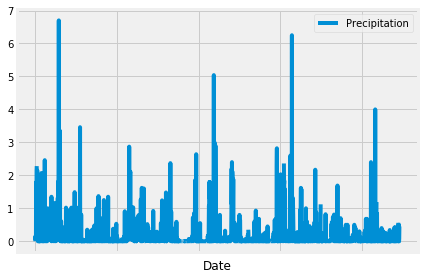

In [12]:
# Calculate the date 1 year ago from the last data point in the database

prcpdata = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(prcpdata, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
df.set_index('Date', inplace = True)
df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data


df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [14]:
# Design a query to show how many stations are available in this dataset?

session.query(Measurement.station).distinct().count()



9

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

acstations = session.query(Measurement.station, func.count(Measurement.station).label('count')).distinct().group_by(Measurement.station).order_by('count desc').all()
acstations


C:\Users\Lexus\Anaconda3\envs\Python_Data\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'count desc'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).distinct().group_by(Measurement.station).order_by('count desc').limit(1)[0][0]
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)]

session.query(*sel).filter(Measurement.station == active_stations).first()

C:\Users\Lexus\Anaconda3\envs\Python_Data\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'count desc'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


(54.0, 85.0, 71.66378066378067)

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# session.query(Measurement.station, func.count(Measurement.tobs).label('count')).filter(Measurement.tobs).group_by(Measurement.station).order_by(Measurement.tobs.desc()).all()

ppdat = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > '2016-08-22').\
filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).all()
ppdat[:10]

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0)]

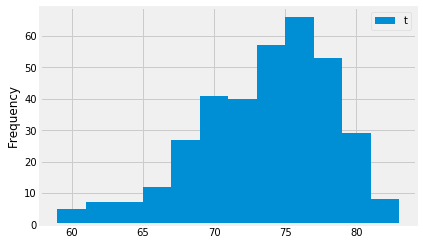

In [18]:
df1 = pd.DataFrame(ppdat, columns = ['date', 'tobs'])
df1.set_index('date', inplace = True)

hist_plot = df1['tobs'].hist(bins=12)
hist_plot.set_ylabel('Frequency')
plt.legend('tobs') 
plt.show()

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example



temp_range = (calc_temps('2016-02-25', '2016-03-05'))
print(temp_range)

[(62.0, 70.04615384615384, 80.0)]


In [20]:
bar_min_m_a = pd.DataFrame(temp_range, columns = ["Min", "Average", "Max"])
bar_min_m_a



# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

p3_tmin = bar_min_m_a['Min']
p3_tavg = bar_min_m_a['Average']
p3_tmax = bar_min_m_a['Max']

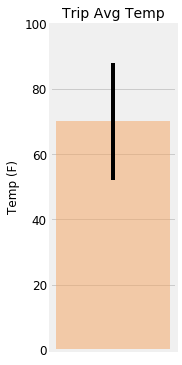

In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


plt.figure(figsize=[2, 6])

totalavg_plt = plt.bar(0, p3_tavg, yerr=18, color='sandybrown', alpha=.5)
#pmax = plt.bar(p3_date, p3_tmax)

plt.ylabel('Temp (F)', fontsize=12)
plt.title('Trip Avg Temp', fontsize=14)
plt.xticks(np.arange(0), fontsize=12)
plt.yticks(np.arange(0, 120, 20), fontsize=12)

plt.show()


## Optional Challenge Assignment